# Project's title
**Gym Chain Model Fitness**

# Project description¶

**The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn.**

**In order to fight churn, Model Fitness has digitized a number of its customer profiles. My task is to analyze them and come up with a customer retention strategy.**

**In order to do that firstly I need to:**

**-Learn to predict the probability of churn (for the upcoming month) for each customer.**

**-Draw up typical user portraits: select the most outstanding groups and describe their main features.**

**-Analyze the factors that impact churn most.**

**-Draw basic conclusions and develop recommendations on how to improve customer service.**

**-Identify target groups**

**-Suggest measures to cut churn**

**-Describe any other patterns I see with respect to interaction with customers.**

**In order to answer all these questions,first I have to load the data, restore and clean it as necessary.check if there are missing values, duplicates.**
**I might need to fill missing values with grouping data from more than one column to get more specefied calculations to move forward with the code.**


# Step 1. Download the data

In [1]:
# Loading all the libraries
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats as st
import seaborn as sns
from functools import reduce
import datetime as dt
from pandas.plotting import scatter_matrix
import warnings
from operator import attrgetter
import matplotlib.colors as mcolors
from IPython.display import Image
from IPython.core.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category = FutureWarning)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

# Step 2. Carry out exploratory data analysis (EDA)

*Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).*

In [3]:
gym.info(memory_usage = 'deep')
gym.head()
gym.sample()
gym.describe()
print(f'length of the data is:', len(gym))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
1701       0              1        1              1      1                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
1701             1   27                     35.283596                    1.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
1701         3                   3.226574                           3.227195   

      Churn  
1701      0

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

length of the data is: 4000


In [4]:
#checking for duplicates
gym.duplicated().sum()

0

In [5]:
gym = gym.rename(str.lower, axis = 'columns')
gym.info()
gym.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

gender  near_location  partner  promo_friends  phone  contract_period  \
9       0              1        0              0      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
9             0   31                     65.310836                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
9        11                   1.810852                           1.951368   

   churn  
9      0

In [6]:
gym['gender'] = gym['gender'].astype('bool')
gym['near_location'] = gym['near_location'].astype('bool')
gym['partner'] = gym['partner'].astype('bool')
gym['promo_friends'] = gym['promo_friends'].astype('bool')
gym['phone'] = gym['phone'].astype('bool')
gym['group_visits'] = gym['group_visits'].astype('bool')
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   near_location                      4000 non-null   bool   
 2   partner                            4000 non-null   bool   
 3   promo_friends                      4000 non-null   bool   
 4   phone                              4000 non-null   bool   
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   bool   
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

**No missing values, the data's length is 4000 and it seems fine. I've changed the columns to lower case, and also changed 'gender', 'near_location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits' to boolean type.**

*Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).*

In [7]:
gym_grouped = gym.groupby(['churn'])['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'].mean()
gym_grouped

gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.027882  
1                               1.044546

**0 means they stayed, 1 means they churned (left). About 50% of those who left are male and female, so our data is distributed evenly. 87% people who stayed live near the gym in contrast to 76% who left. 53% of those who stayed are partners in contrast to 35% who left. 35% of the people who stayed used the 'promo friends' in contast to 18% who left. 
About 90% from each group gave us their phone number. 
About contract period, those who stayed had longer contracts. 
About the age, I don't think we can conclude anything from it, since the age gap is pretty close. But maybe those who are younger don't have a vehicle and that was the reason they decided to leave.**


*Plot bar histograms and feature distributions for those who left (churn) and those who stayed.*

<AxesSubplot:xlabel='gender', ylabel='Density'>

<AxesSubplot:xlabel='gender', ylabel='Density'>

Text(0.5, 1.0, 'gender')

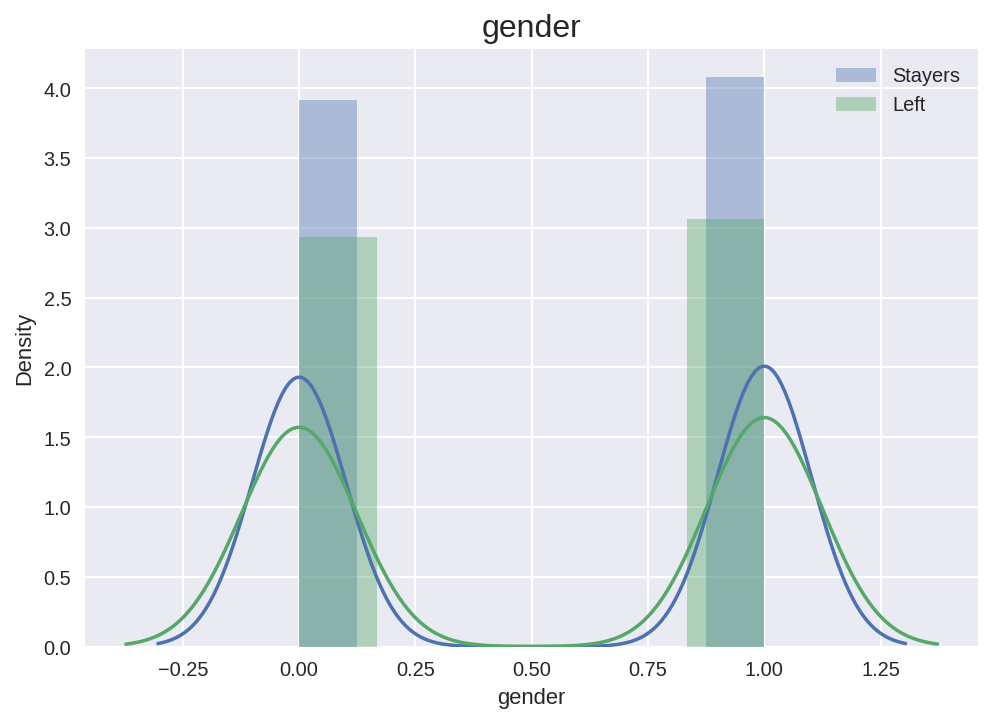

<AxesSubplot:xlabel='near_location', ylabel='Density'>

<AxesSubplot:xlabel='near_location', ylabel='Density'>

Text(0.5, 1.0, 'near_location')

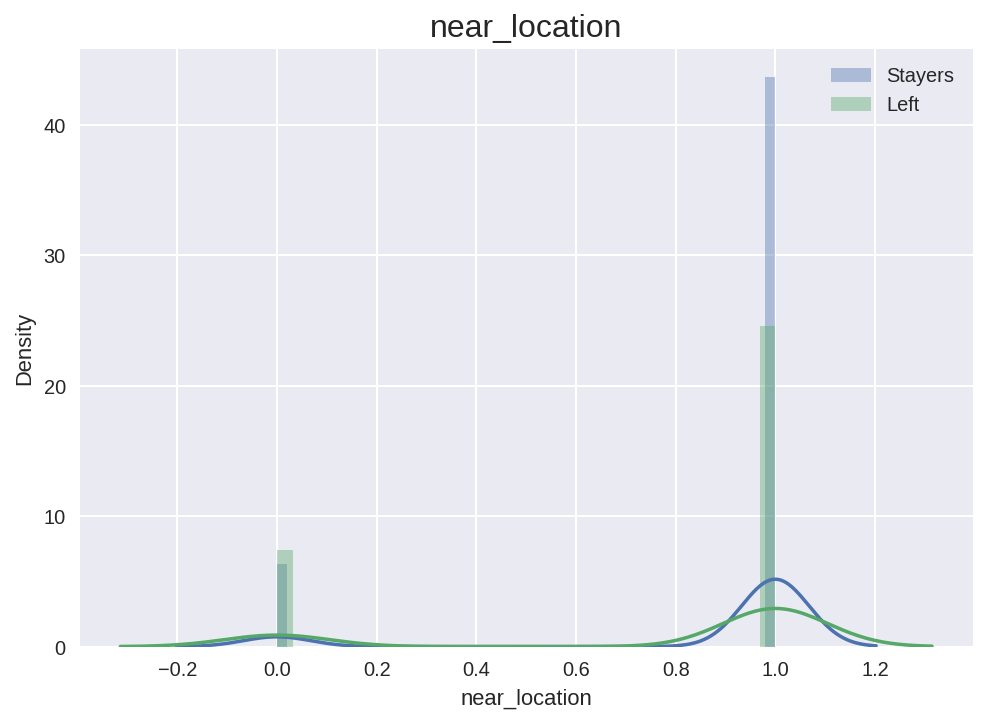

<AxesSubplot:xlabel='partner', ylabel='Density'>

<AxesSubplot:xlabel='partner', ylabel='Density'>

Text(0.5, 1.0, 'partner')

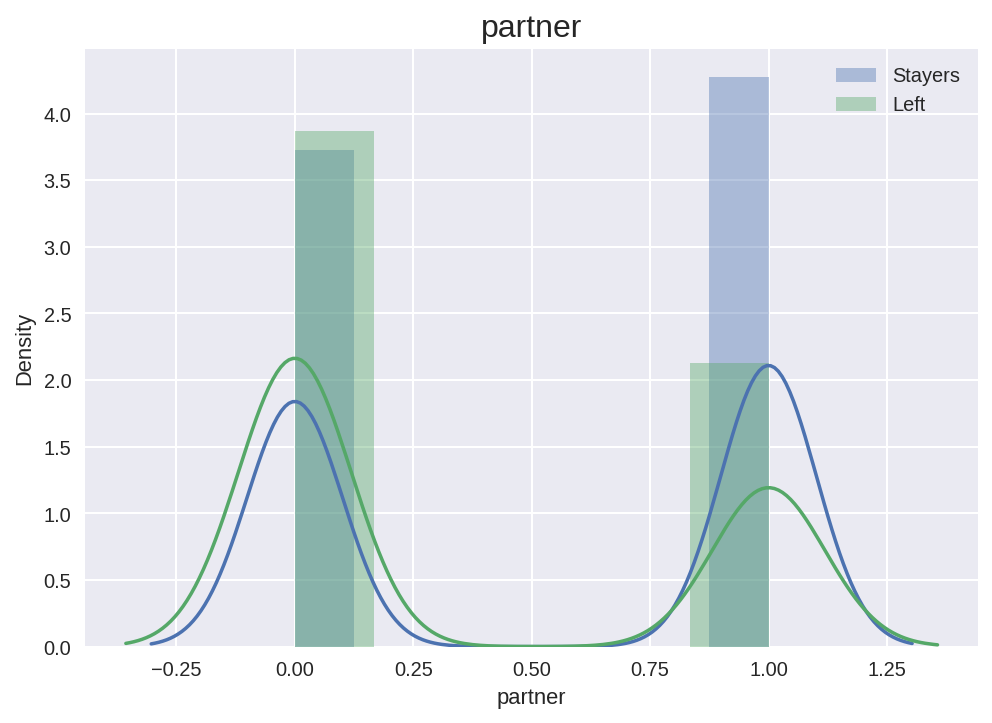

<AxesSubplot:xlabel='promo_friends', ylabel='Density'>

<AxesSubplot:xlabel='promo_friends', ylabel='Density'>

Text(0.5, 1.0, 'promo_friends')

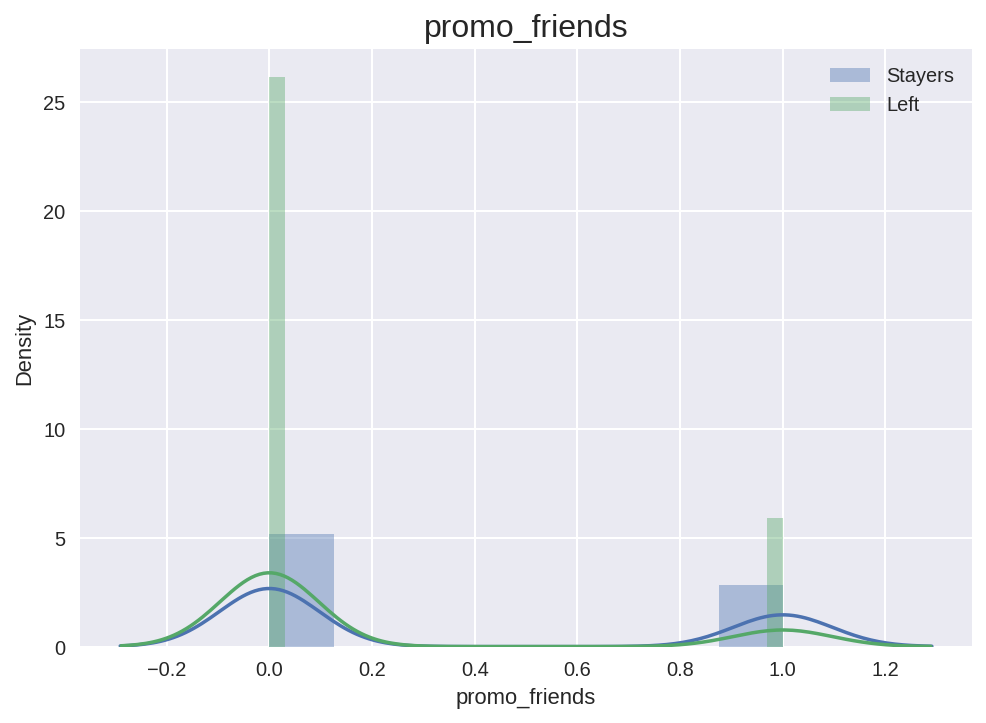

<AxesSubplot:xlabel='phone', ylabel='Density'>

<AxesSubplot:xlabel='phone', ylabel='Density'>

Text(0.5, 1.0, 'phone')

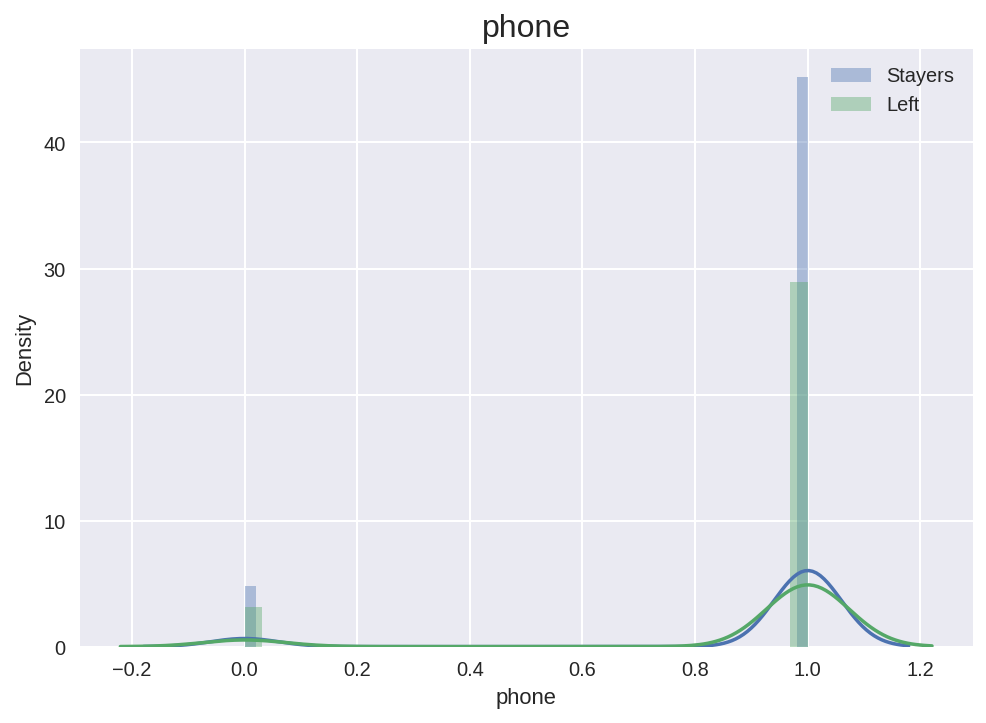

<AxesSubplot:xlabel='contract_period', ylabel='Density'>

<AxesSubplot:xlabel='contract_period', ylabel='Density'>

Text(0.5, 1.0, 'contract_period')

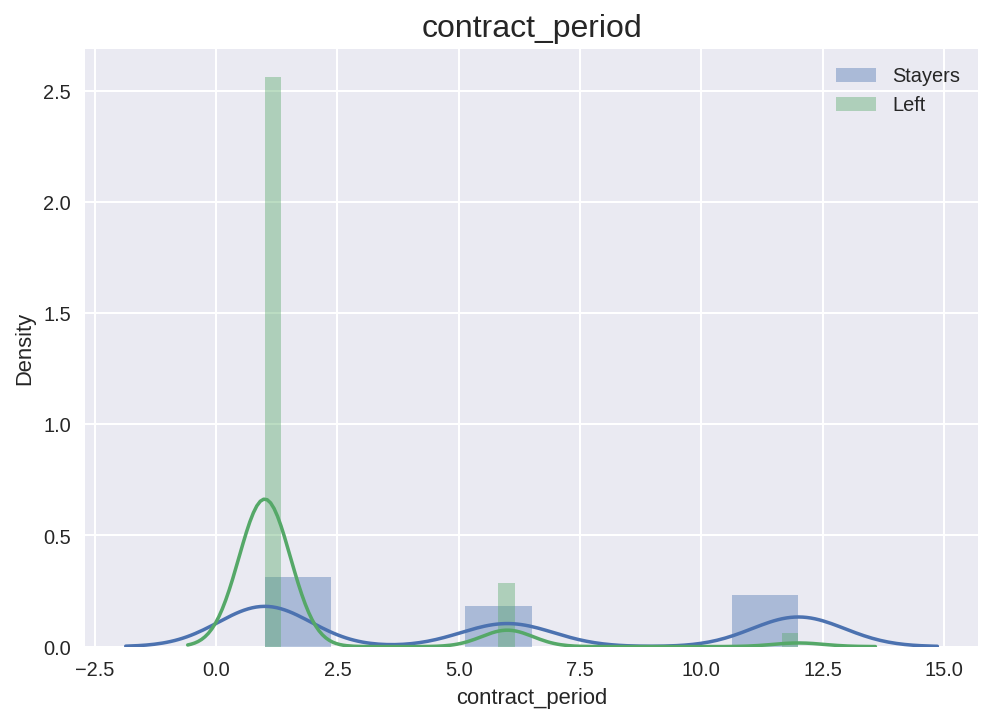

<AxesSubplot:xlabel='group_visits', ylabel='Density'>

<AxesSubplot:xlabel='group_visits', ylabel='Density'>

Text(0.5, 1.0, 'group_visits')

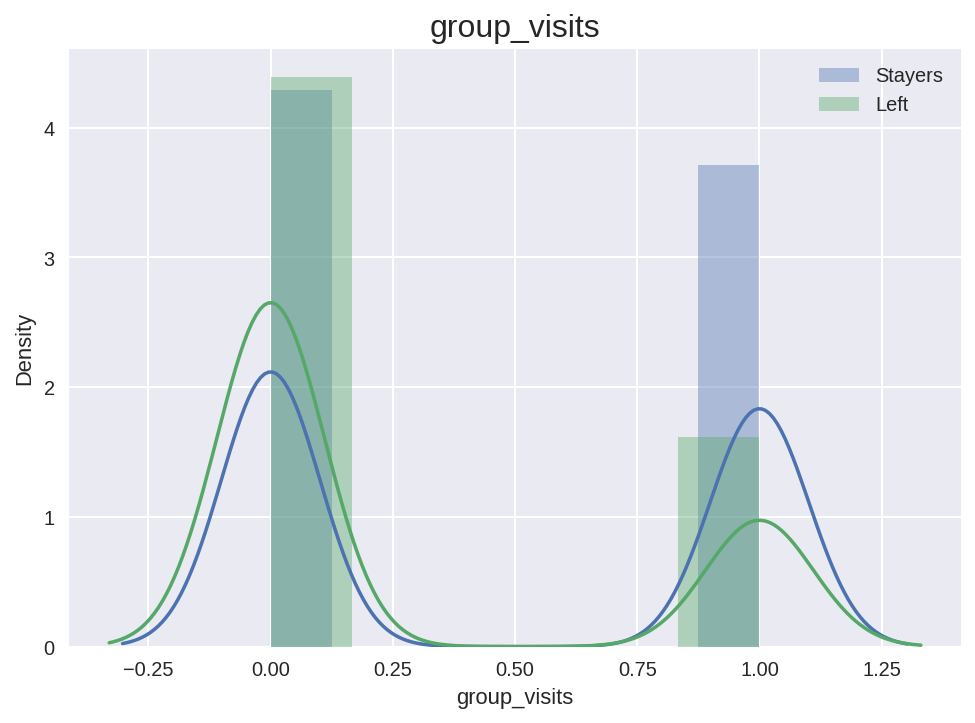

<AxesSubplot:xlabel='age', ylabel='Density'>

<AxesSubplot:xlabel='age', ylabel='Density'>

Text(0.5, 1.0, 'age')

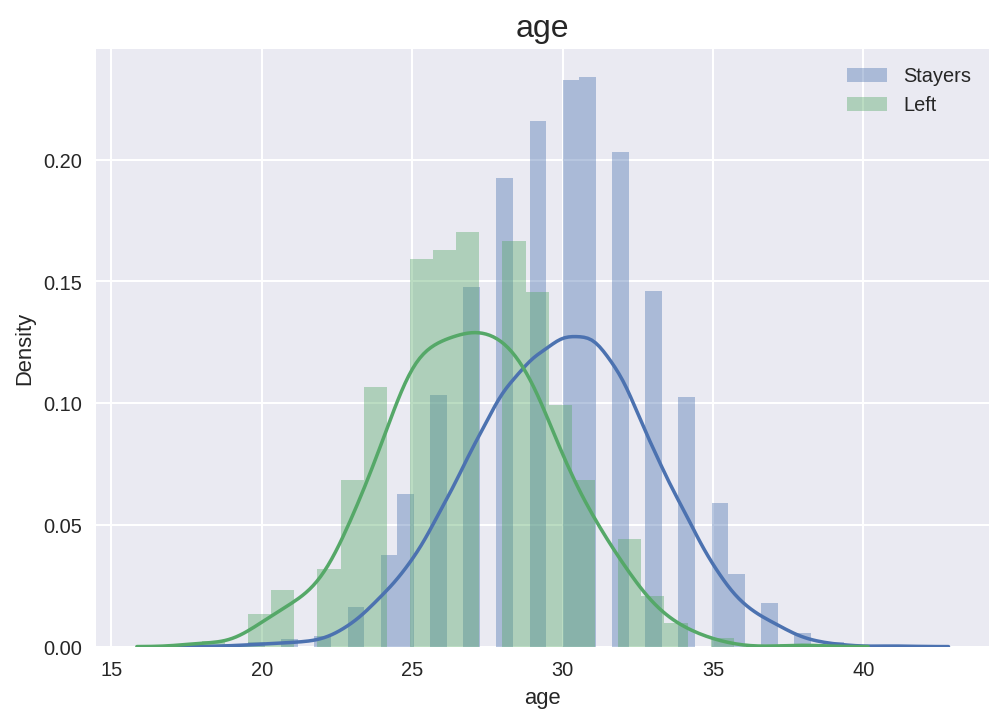

<AxesSubplot:xlabel='avg_additional_charges_total', ylabel='Density'>

<AxesSubplot:xlabel='avg_additional_charges_total', ylabel='Density'>

Text(0.5, 1.0, 'avg_additional_charges_total')

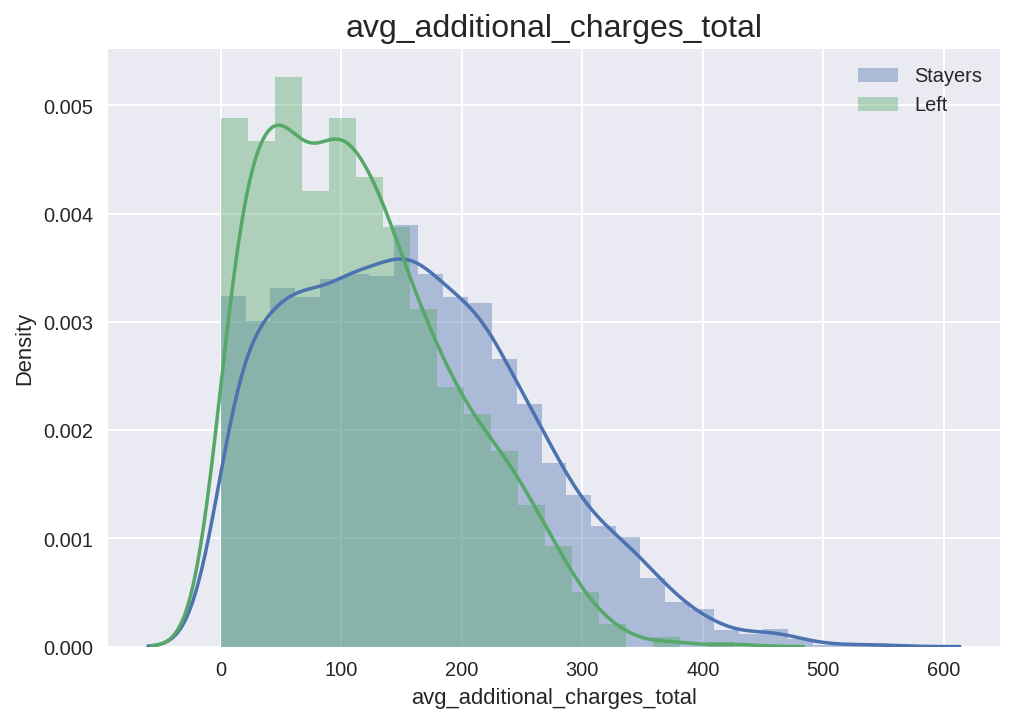

<AxesSubplot:xlabel='month_to_end_contract', ylabel='Density'>

<AxesSubplot:xlabel='month_to_end_contract', ylabel='Density'>

Text(0.5, 1.0, 'month_to_end_contract')

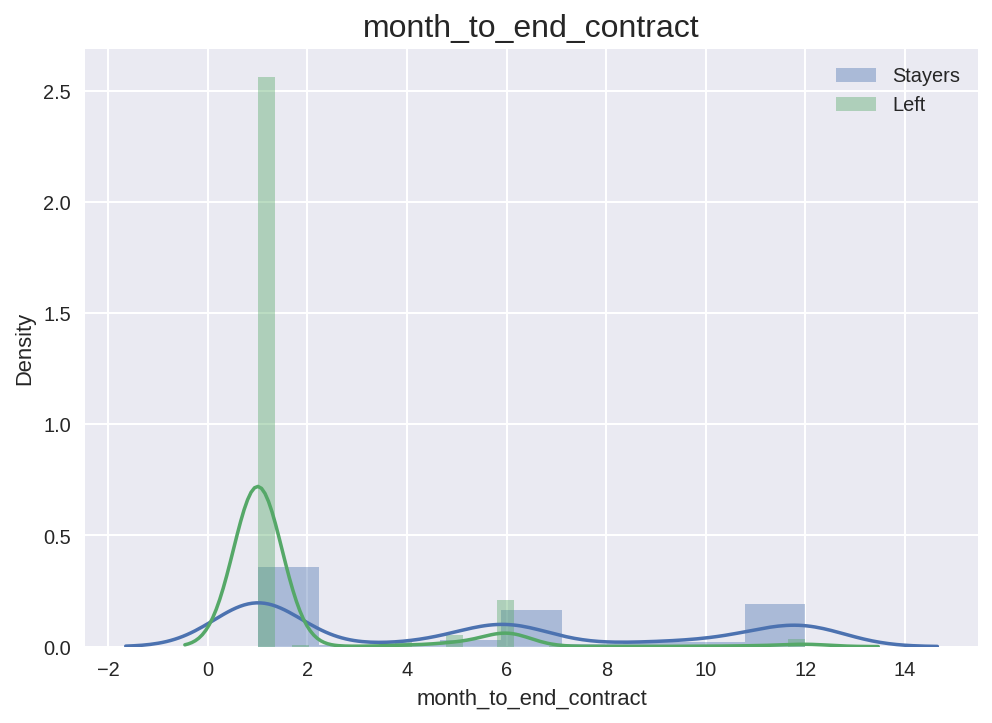

<AxesSubplot:xlabel='lifetime', ylabel='Density'>

<AxesSubplot:xlabel='lifetime', ylabel='Density'>

Text(0.5, 1.0, 'lifetime')

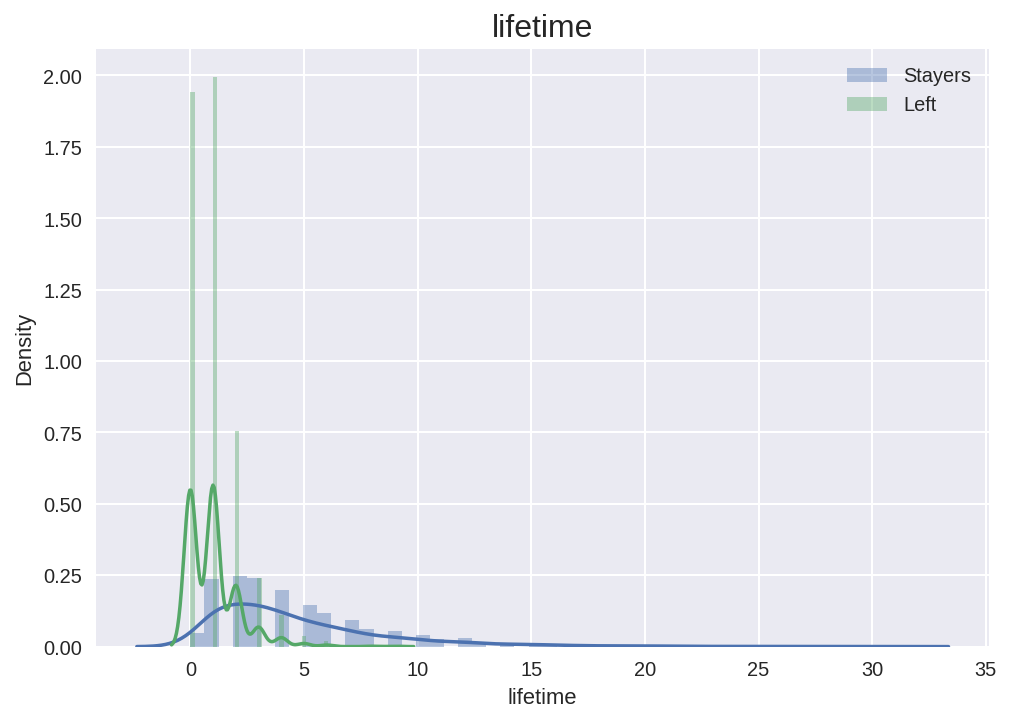

<AxesSubplot:xlabel='avg_class_frequency_total', ylabel='Density'>

<AxesSubplot:xlabel='avg_class_frequency_total', ylabel='Density'>

Text(0.5, 1.0, 'avg_class_frequency_total')

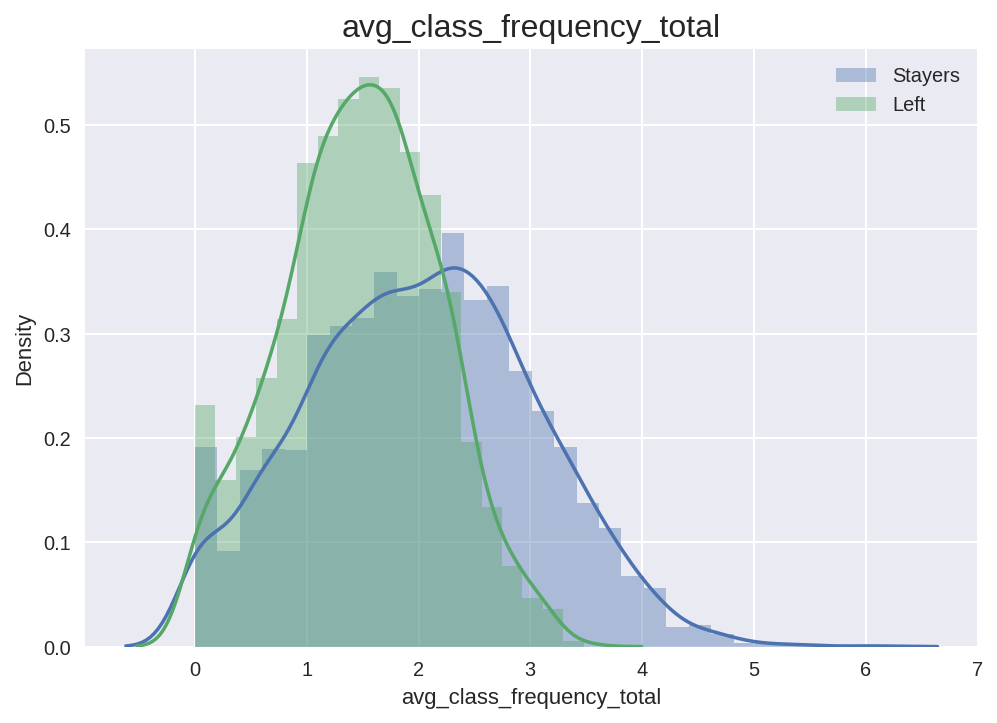

<AxesSubplot:xlabel='avg_class_frequency_current_month', ylabel='Density'>

<AxesSubplot:xlabel='avg_class_frequency_current_month', ylabel='Density'>

Text(0.5, 1.0, 'avg_class_frequency_current_month')

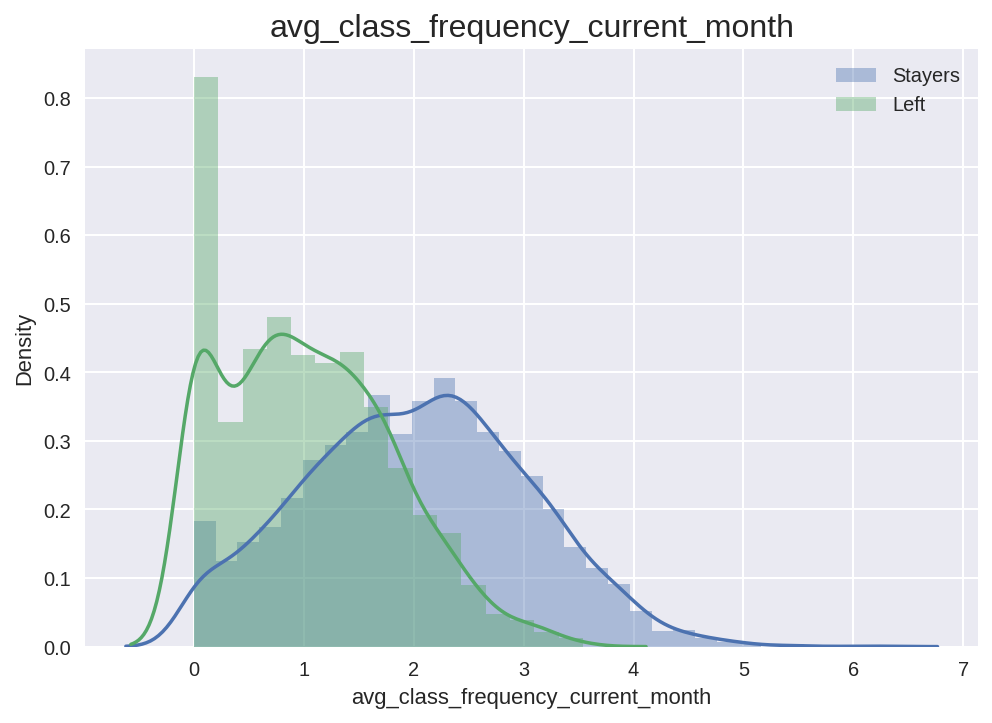

In [8]:
gym_churn_left = gym.loc[gym['churn'] == 1]
gym_churn_stay = gym.loc[gym['churn'] == 0]

for col in gym.drop('churn', axis = 1).columns:
    sns.distplot(gym_churn_stay[col], label='Stayers')
    sns.distplot(gym_churn_left[col], label='Left')
    plt.title(col, fontsize=16)
    plt.legend()
    plt.show()

**We can tell from the plots: that We have more people who stayed.Most of those who stayed live near the gym. People who stayed most likely used the partner discounts.**


*Build a correlation matrix and display it.*

<AxesSubplot:>

(15.0, 0.0)

Text(0.5, 1.0, 'Correlation Matrix')

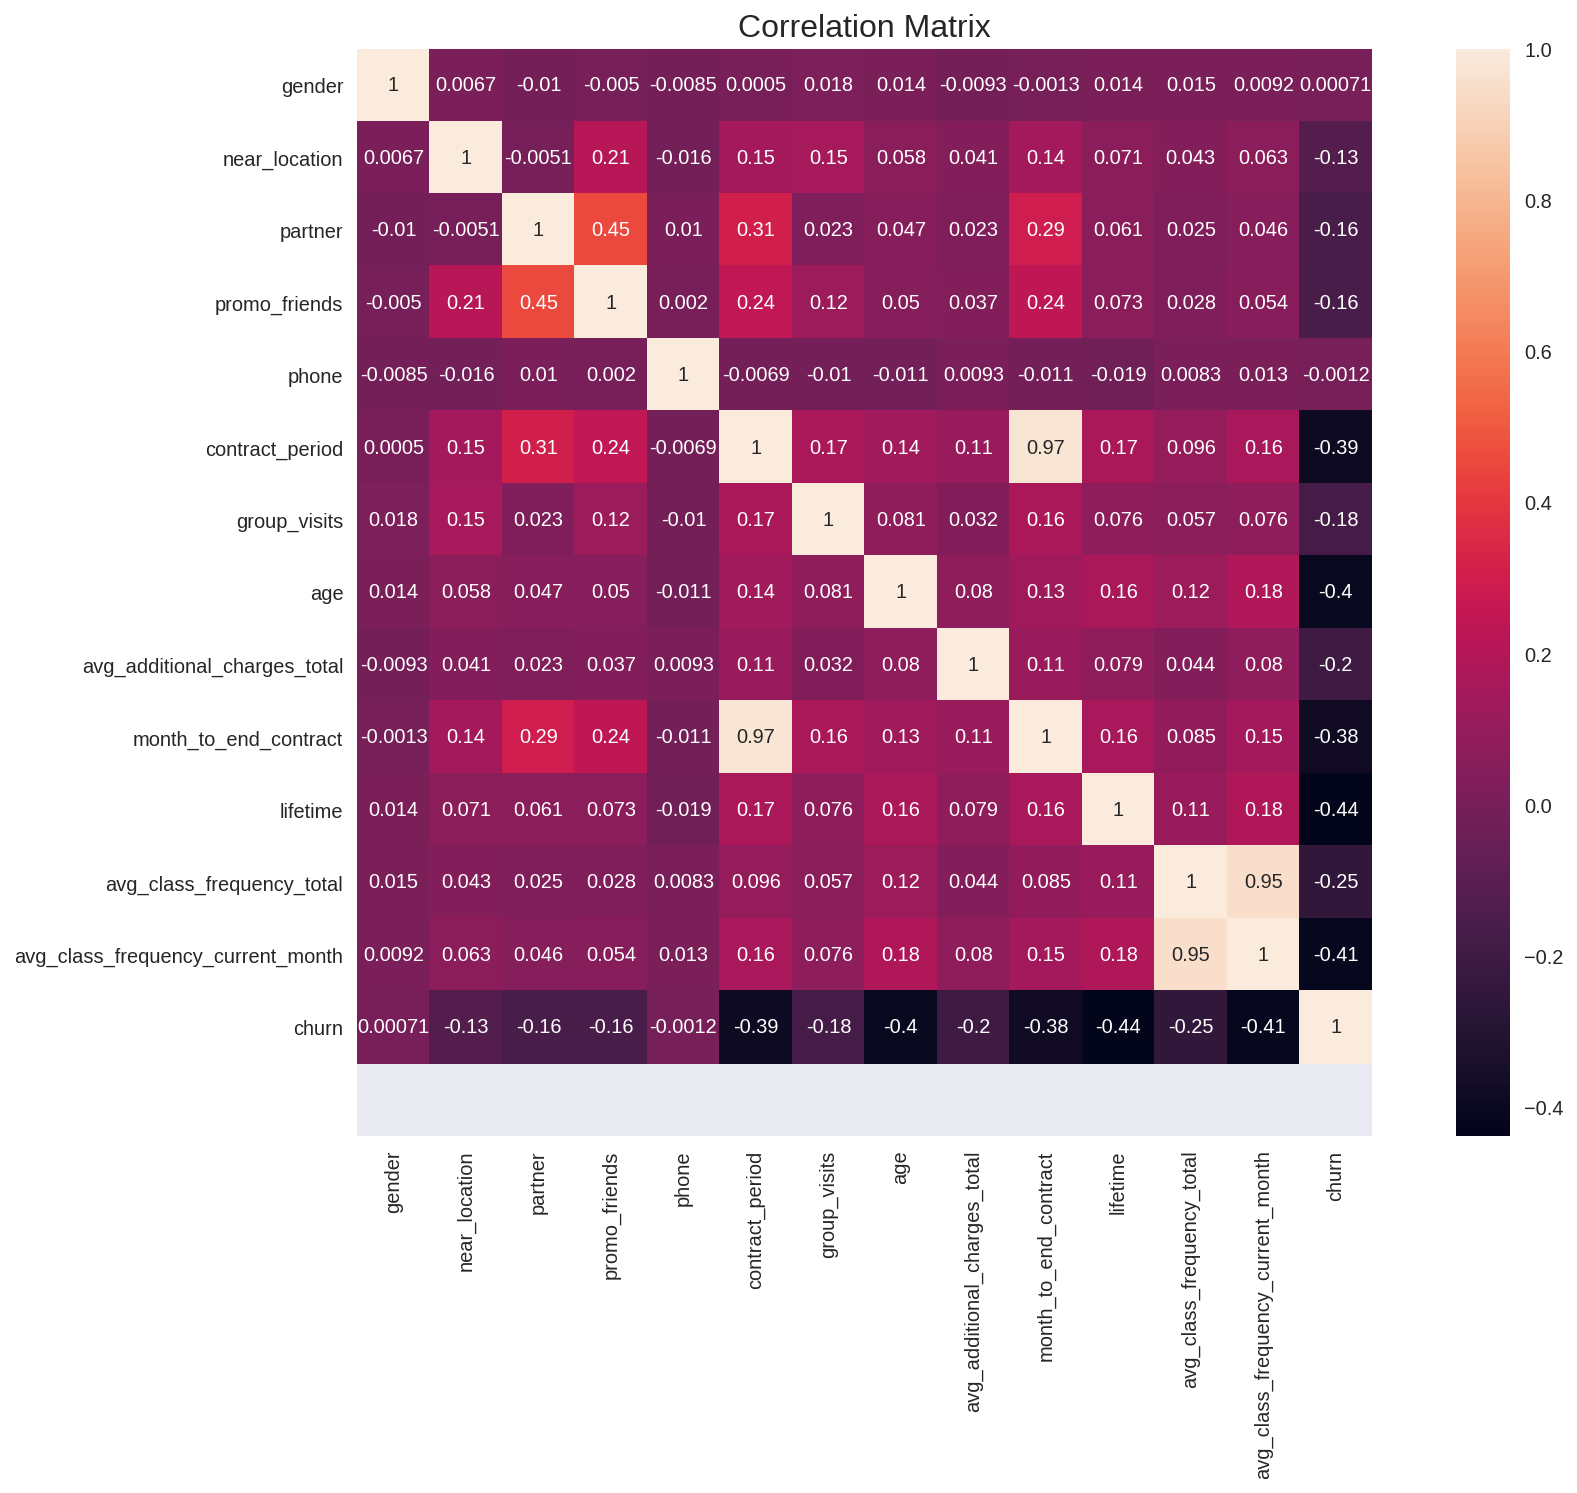

In [9]:
cor = gym.corr()
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(cor, annot = True, square=True)
ax.set_ylim(15,0)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

**From the plot we can see that 'month_to_end_contract' is highly correlated with 'contract_period'. 'avg_class_frequency_total' is highly correlated with 'avg_class_frequency_current_month'. Since these columns are correlated I've decided to remove them to be more precise with the calculations for the rest of the project.**


In [10]:
gym_cor = gym.drop(['avg_class_frequency_total', 'contract_period'], axis = 1)
gym_cor.sample()

gender  near_location  partner  promo_friends  phone  group_visits  age  \
152    True           True     True           True   True          True   32   

     avg_additional_charges_total  month_to_end_contract  lifetime  \
152                    207.524673                    9.0         1   

     avg_class_frequency_current_month  churn  
152                           0.054158      0

# Step 3. Build a model to predict user churn

*Build a binary classification model for customers where the target feature is the user's leaving next month.
Divide the data into train and validation sets using the train_test_split() function.*

In [11]:
X = gym_cor.drop(columns = ['churn'])
y = gym_cor['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.fit_transform(X_train) 

X_test_st = scaler.transform(X_test)


StandardScaler()

*Train the model on the train set with two methods:
logistic regression and 
random forest*

**LOGISTIC REGRESSION**

In [12]:
model_1 = LogisticRegression(random_state=0, solver = 'newton-cg')
model_1.fit(X, y)
predictions_1 = model_1.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)[:,1]

def mape(y_test, y_pred):
    y_error = y_test- y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs/ y_test
    mape = (perc_error_abs.sum() / len(y_test))
    return mape

def print_all_metrics(y_true, y_pred, y_proba, title= 'Metrics'):
    print('title')
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    print('\tMAE: {:.2f} MSE: {:.2f} MAPE:{:.2f} R2: {:.2f}'.format(mean_absolute_error(y_true, y_pred),
                                                                   mean_squared_error(y_true, y_pred),
                                                                   mape(y_true, y_pred),
                                                                   r2_score(y_true, y_pred)))
    
print_all_metrics(y_test, predictions_1, probabilities_1, title= 'Metrics for the automatic prediction made with predict for logistic regression')

threshold = 0.361
custom_predictions = [0 if i<threshold else 1 for i in probabilities_1]

print_all_metrics(y_test, custom_predictions, probabilities_1, title= 'Metrics for the prediction with custom threshold for logistic regression')

weight_0 = model_1.intercept_
feature_weights0 = model_1.coef_
print('weight_0:', weight_0)
print('feature_weights:', feature_weights0)

LogisticRegression(random_state=0, solver='newton-cg')

title
	Accuracy: 0.91
	Precision: 0.81
	Recall: 0.81
	F1: 0.81
	ROC_AUC: 0.96
	MAE: 0.10 MSE: 0.10 MAPE:inf R2: 0.49
title
	Accuracy: 0.90
	Precision: 0.75
	Recall: 0.87
	F1: 0.81
	ROC_AUC: 0.96
	MAE: 0.10 MSE: 0.10 MAPE:inf R2: 0.45
weight_0: [15.99088627]
feature_weights: [[ 0.07441672 -0.19880124 -0.17063004 -0.45008615 -0.24502704 -0.81354907
  -0.36526614 -0.00588018 -0.3303658  -1.04159208 -1.2386833 ]]


**I can say that Our predictions with custom threshold is prefered, since we can see that Recall improved by 0.07. Precision is lower by 0.06 and also accuracy is lower by 0.01.**

**RANDOM FOREST**

In [13]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for Random forest classifier:')

feature_weights2 = rf_model.feature_importances_
print('Feature importance:', feature_weights2)

RandomForestClassifier(random_state=0)

title
	Accuracy: 0.91
	Precision: 0.82
	Recall: 0.78
	F1: 0.80
	ROC_AUC: 0.95
	MAE: 0.10 MSE: 0.10 MAPE:inf R2: 0.49
Feature importance: [0.01572324 0.01190245 0.01595449 0.01603309 0.00816518 0.0198219
 0.13987297 0.12459099 0.1166195  0.32161448 0.2097017 ]


**Here I showed the weight for each feature.**

*Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?*

**Looking at all metricces and errors we can tell that that Logistic Rregression is the leading model.
Accuracy: RandomForestClassifier 0.91, and LogisticRegression 0.91/0.9.
Precision: RandomForestClassifier 0.82 and LogisticRegression 0.81/0.75
Recall: RandomForestClassifier 0.78 and LogisticRegression 0.81/0.87**


# Step 4. Create user clusters

*Set aside the column with data on churn and identify object (user) clusters:
Standardize the data.*

In [14]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)
print(x_sc[:3])

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  1.19403206
  -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.19403206
   0.55732732 -0.35021325  1.83194105  0.87368001  0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.83749845
  -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02901851]]


*Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.*

In [15]:
# linked = linkage(x_sc, method = 'ward')

# plt.figure(figsize= (15, 15))
# dendrogram(linked, orientation='top')
# plt.title('Hierarchial clustering for gym')
# plt.show()

**I have 4 clusteres.**

*Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)*

In [16]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(x=df[x_name], y=df[y_name],
            hue = df[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
    
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_sc)
gym_cor['cluster_num'] = labels

gym_cor.head()
    

gender  near_location  partner  promo_friends  phone  group_visits  age  \
0    True           True     True           True  False          True   29   
1   False           True    False          False   True          True   31   
2   False           True     True          False   True         False   28   
3   False           True     True           True   True          True   33   
4    True           True     True           True   True         False   26   

   avg_additional_charges_total  month_to_end_contract  lifetime  \
0                     14.227470                    5.0         3   
1                    113.202938                   12.0         7   
2                    129.448479                    1.0         2   
3                     62.669863                   12.0         2   
4                    198.362265                    1.0         3   

   avg_class_frequency_current_month  churn  cluster_num  
0                           0.000000      0            3  
1                           1.910244      0            1  
2                           1.736502      0            0  
3                           3.357215      0            3  
4                           1.120078      0            3

**I used Kmeans = 5 and got our cluster numbers assigned.**


*Look at the mean feature values for clusters. Does anything catch your eye?*

In [17]:
gym_churn_grp = gym_cor.groupby(['cluster_num']).mean()
gym_churn_grp

gender  near_location   partner  promo_friends     phone  \
cluster_num                                                               
0            0.510507       1.000000  0.224969       0.114957  0.899876   
1            0.551391       0.998791  0.275695       0.074970  0.897219   
2            0.495352       0.998672  0.378486       0.046481  0.903054   
3            0.492492       0.994995  0.952953       1.000000  0.905906   
4            0.501634       0.000000  0.490196       0.073529  0.913399   

             group_visits        age  avg_additional_charges_total  \
cluster_num                                                          
0                0.187886  26.800989                    111.061687   
1                1.000000  30.275695                    155.484435   
2                0.000000  30.342629                    174.392898   
3                0.527528  29.637638                    154.187816   
4                0.233660  28.694444                    137.236762   

             month_to_end_contract  lifetime  \
cluster_num                                    
0                         1.710754  1.422744   
1                         4.730351  4.499395   
2                         4.698539  5.166003   
3                         6.725726  4.290290   
4                         2.839869  3.024510   

             avg_class_frequency_current_month     churn  
cluster_num                                               
0                                     0.984420  0.740420  
1                                     2.044372  0.089480  
2                                     2.237272  0.046481  
3                                     1.919698  0.107107  
4                                     1.599137  0.401961

**Cluster 2 are most using the partner discount and promo frinds. Cluster 1+2 attend most group visits and have the lowest churn mean.**

*Plot distributions of features for the clusters. Do you notice anything?*

In [18]:
cat_vars = gym_cor[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn', 'cluster_num']]
num_vars = gym_cor[['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month', 'cluster_num']]



In [19]:
print('Numeric features:')
for i in num_vars.columns:
    px.box(x= num_vars['cluster_num'], y=num_vars[i], title=i)

Numeric features:


In [20]:
print('Categorical features:')
for i in cat_vars.columns:
    px.histogram(cat_vars, x='cluster_num', color=i, title=i)

Categorical features:


**We split our data to numerical and categorical values. 
Age: cluster 0 has the smallest median(28) in contrast to cluster 4 with median 31.
avg_additional_charges_total: cluster 4 with median of 172!  while cluster 0 with median 103.
lifetime and avg_class_frequency_current_month: cluster 4 is first with median of 5 and 2.4 consistently.**


*Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?*

In [21]:
gym_churn_groups = gym_cor.groupby(['cluster_num'])['churn'].mean()
gym_churn_groups

cluster_num
0    0.740420
1    0.089480
2    0.046481
3    0.107107
4    0.401961
Name: churn, dtype: float64

**Cluster number 3+4 have the smallest chance to churn in comparison to cluster 0 that has a higher chance.**


# Step 5. Come up with conclusions and basic recommendations on working with customers

*Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.*

**1- We need to know the exact time of subscription, time of churn. I think it might help us get better answers in the future.**

**2- We can tell that people who live far from the gym, have a higher tendency to quit. So maybe we should do them a discount, or maybe some happy event so that those people get to know each other and start coming together (in  the same vehicle).**

**3- We should embrace Partners and promotions for friends since it's going great!**

**4- People with longer contracts have a tendency to stay longer and not quit, so maybe we should sell a longer subscription to the gym, and those who take the longer subscription get a discount.**
